In [1]:
## Generic Function for plotting time complexity

import timeit
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def find_optimal_degree(x_data, y_data, max_degree=20, alpha=0.1):
    working_x = np.array(x_data)
    working_y = np.array(y_data)
    cv_scores = []

    scaler = StandardScaler()
    working_x = scaler.fit_transform(working_x.reshape(-1, 1))

    for degree in range(1, max_degree + 1):
        model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        scores = -cross_val_score(model, working_x, working_y, cv=5, scoring='neg_mean_squared_error')
        cv_scores.append(scores.mean())

    # Find the degree with the minimum cross-validated mean squared error
    optimal_degree = np.argmin(cv_scores) + 1  # Adding 1 because degrees start from 1
    return optimal_degree

def plot_time_complexity(x_data, y_data, title, fit=True):
    print("\n Timing done. Fitting started.\n")
    # Find the optimal degree using cross-validation
    degree = find_optimal_degree(x_data, y_data)
    # Fit a polynomial curve to the data
    coefficients = np.polyfit(x_data, y_data, degree)
    polynomial = np.poly1d(coefficients)
    fitted_curve = polynomial(x_data)

    color_dark = '#3E4C59'
    color_light = '#8FB0CE'

    # Plot the results
    if(fit == True):
        plt.plot(x_data, y_data, marker='o', label='Actual Data', color=color_light)
        plt.plot(x_data, fitted_curve, label=f'Fitted Curve (Degree {degree})', color=color_dark)
    elif(fit != True):
        plt.plot(x_data, y_data, marker='o', label='Actual Data', color=color_dark)
    plt.title(title)
    plt.xlabel('Input Size')
    plt.ylabel('Computation Time (seconds)')
    plt.legend()
    plt.show()


In [2]:
import random
import sys

def generate_random_input_data(num_elements):
    input_data = []
    for i in range(1, num_elements + 1):
        # Generate a random number with (i+1) digits
        random_number = random.randint(10**i, 10**(i + 1) - 1)
        input_data.append(random_number)

        # Print progress message without a newline, flush the output, and flush the standard output
        print(f"\rGenerating {i}th element", end='', flush=True)
        sys.stdout.flush()

    print("\nGeneration complete.")
    return input_data

Problem 1
---
Develop a program that efficiently determines the next higher permutation of a positive integer represented as a list of decimal digits. The next higher permutation is defined as the smallest integer greater than the given integer, while maintaining the same set of digits. Ensure that the program returns the result as a list of decimal digits. This task requires a careful consideration of algorithmic efficiency and precision in handling digit permutations, elevating the difficulty level of the problem. For example, the next higher permutation of 123542 is 124235.

In [3]:
def next_permutation(nums):
    # Find the first element from the right that is smaller than its next element
    i = len(nums) - 2
    while i >= 0 and nums[i] >= nums[i + 1]:
        i -= 1

    # If no such element is found, it means the given permutation is the highest
    if i == -1:
        return None

    # Find the smallest element to the right of 'i' that is greater than nums[i]
    j = len(nums) - 1
    while nums[j] <= nums[i]:
        j -= 1

    # Swap nums[i] and nums[j]
    nums[i], nums[j] = nums[j], nums[i]

    # Reverse the subarray to the right of 'i'
    nums[i + 1:] = reversed(nums[i + 1:])

    return nums

def find_next_permutation(number):
    # Convert the number to a list of digits
    nums = [int(digit) for digit in str(number)]

    # Find the next permutation
    next_perm = next_permutation(nums)

    # If the given permutation is already the highest, return None
    if next_perm is None:
        return None

    # Convert the list of digits back to an integer
    result = int(''.join(map(str, next_perm)))

    return result

# Example usage:
input_number = 123542
result = find_next_permutation(input_number)

if result is not None:
    print(f"The next higher permutation of {input_number} is {result}.")
else:
    print(f"{input_number} is already the highest permutation.")


The next higher permutation of 123542 is 124235.


In [4]:
input_data = generate_random_input_data(1000)
# plot_time_complexity(find_next_permutation, input_data, 'Time Complexity of find_next_permutation')

Generating 1000th element
Generation complete.


In [5]:
# Initialize lists to store input sizes and corresponding computation times
input_sizes = []
computation_times = []
for index, data in enumerate(input_data):
    # Measure the time taken to execute the function with the given input data
    time_taken = timeit.timeit(lambda: find_next_permutation(data), number=1000)
    print(f"\rTiming {index+1}th element", end='', flush=True)
    # Store input size and corresponding computation time
    input_sizes.append(len(str(data)))
    computation_times.append(time_taken)


Timing 1000th element


 Timing done. Fitting started.



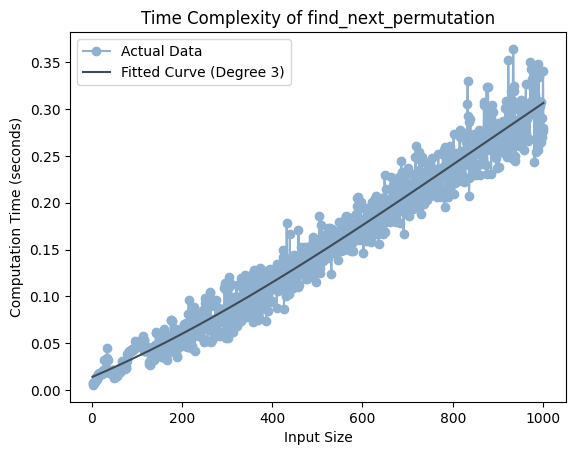

In [6]:
plot_time_complexity(input_sizes, computation_times, 'Time Complexity of find_next_permutation')

Problem 2
---
Develop a program that systematically generates the sequence of moves required to transfer a set of N discs from an initial arrangement on one pole to a target arrangement on another pole. The setup involves multiple poles and discs, each with varying diameters. The primary goal is to move all discs from the initial pole to the target pole while respecting two fundamental constraints: only the topmost disc on a pole can be moved at any given time, and no disc may be placed on a smaller disc. This programming task entails devising an algorithm capable of efficiently producing the sequence of moves, demonstrating heightened complexity due to the nuanced management of disc placements and strict adherence to the specified rules.

In [7]:
def tower_of_hanoi(n, source='SOURCE', target='TARGET', auxiliary='AUXILIARY'):
    if n == 1:
        #print(f"Move disk 1 from {source} to {target}")
        return
    tower_of_hanoi(n-1, source, auxiliary, target)
    #print(f"Move disk {n} from {source} to {target}")
    tower_of_hanoi(n-1, auxiliary, target, source)

In [8]:
input_list = list(range(3,20))

In [9]:
# Initialize lists to store input sizes and corresponding computation times
input_sizes = []
computation_times = []
for index, data in enumerate(input_list):
    # Measure the time taken to execute the function with the given input data
    time_taken = timeit.timeit(lambda: tower_of_hanoi(data), number=1000)
    print(f"\rTiming {index+4}th element", end='', flush=True)
    # Store input size and corresponding computation time
    input_sizes.append(data)
    computation_times.append(time_taken)


Timing 20th element


 Timing done. Fitting started.



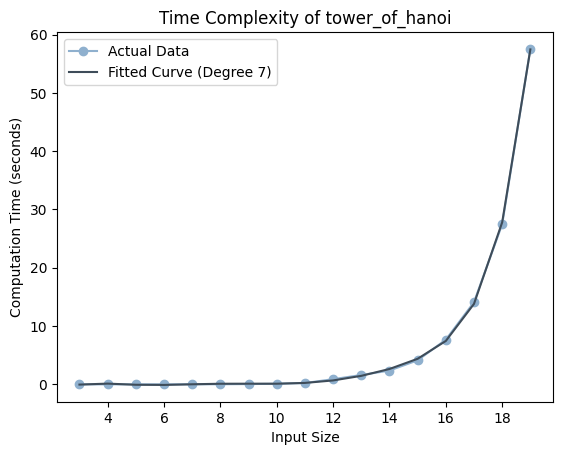

In [10]:
plot_time_complexity(input_sizes, computation_times, 'Time Complexity of tower_of_hanoi')

Problem 3
---
Create a program designed to address a classic optimization challenge involving the determination of the most efficient route among a set of cities. In this problem, the objective is to find the shortest possible path that visits each city exactly once, returning to the starting city. The program should adeptly explore and assess potential routes, providing an optimal solution. Accomplishing this task necessitates the incorporation
of an algorithm, whether heuristic or exact, capable of efficiently navigating the intricacies inherent in identifying the shortest path within a specified collection of cities. Use the hill climbing algorithm to solve the problem.

In [11]:
import random
import math

def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        distance += euclidean_distance(cities[route[i]], cities[route[i + 1]])
    distance += euclidean_distance(cities[route[-1]], cities[route[0]])  # Return to the starting city
    return distance

def hill_climbing_tsp(cities, iterations=1000):
    num_cities = len(cities)
    current_route = list(range(num_cities))
    random.shuffle(current_route)  # Random initial solution

    for _ in range(iterations):
        # Generate a neighboring solution by swapping two random cities
        neighbor_route = current_route.copy()
        index1, index2 = random.sample(range(num_cities), 2)
        neighbor_route[index1], neighbor_route[index2] = neighbor_route[index2], neighbor_route[index1]

        # Evaluate the total distance of the current and neighboring routes
        current_distance = total_distance(current_route, cities)
        neighbor_distance = total_distance(neighbor_route, cities)

        # Accept the neighboring solution if it's better
        if neighbor_distance < current_distance:
            current_route = neighbor_route

    return current_route

# Example usage:
cities = [(0, 0), (1, 2), (3, 1), (4, 3)]
optimal_route = hill_climbing_tsp(cities)

print("Optimal route:", optimal_route)
print("Optimal distance:", total_distance(optimal_route, cities))


Optimal route: [1, 3, 2, 0]
Optimal distance: 10.79669127533634


In [12]:
from itertools import permutations
import random

def generate_sample_routes(max_cities, num_samples):
    all_routes = []

    for _ in range(num_samples):
        # Generate a random number of cities between 5 and max_cities
        num_cities = random.randint(5, max_cities)

        # Generate a list of cities
        cities = [(i, i) for i in range(num_cities)]

        # Get all permutations of the cities
        all_permutations = permutations(cities)

        # Select a random permutation and convert it to a list
        random_permutation = random.choice(list(all_permutations))
        route = list(random_permutation)

        all_routes.append(route)

    return all_routes



Problem 4
---
In the realm of Artificial Intelligence, contemplate a problem involving two containers of indeterminate capacity, referred to as jugs. One jug has a capacity of 3 units, while the other holds up to 4 units. There is no markings or additional measuring instruments, the objective is to develop a strategic approach to precisely fill the 4-unit jug with 2 units of water. The restriction stipulates the use of solely the aforementioned jugs, excluding any supplementary tools. Both jugs initiate the scenario in an empty state.
The aim is to attain the desired water quantity in the 4-unit jug by executing a sequence of permissible operations, including filling, emptying, and pouring water between the jugs. The challenge in this scenario involves crafting an algorithm, such as Depth First Search, to systematically explore and determine the optimal sequence of moves for accomplishing the task while adhering to the defined constraints.

In [2]:

def pour(jug1, jug2):
    max1, max2 = 3, 4   # capacities of the jugs
    if jug1 == 0:
        return 0, jug2  # pour from jug2 to jug1
    elif jug2 == max2:
        return jug1, 0  # pour from jug1 to jug2
    else:
        amount = min(jug1, max2 - jug2)
        return jug1 - amount, jug2 + amount

def dfs(current_state, visited):
    jug1, jug2 = current_state
    if jug2 == 2:
        return True  # solution found
    visited.add(current_state)
    for action in ['Fill Jug 1', 'Fill Jug 2', 'Empty Jug 1', 'Empty Jug 2', 
                   'Pour Jug 1 to Jug 2', 'Pour Jug 2 to Jug 1']:
        if action == 'Fill Jug 1':
            next_state = (3, jug2)
        elif action == 'Fill Jug 2':
            next_state = (jug1, 4)
        elif action == 'Empty Jug 1':
            next_state = (0, jug2)
        elif action == 'Empty Jug 2':
            next_state = (jug1, 0)
        elif action == 'Pour Jug 1 to Jug 2':
            next_state = pour(jug1, jug2)
        elif action == 'Pour Jug 2 to Jug 1':
            next_state = pour(jug2, jug1)
        
        if next_state not in visited:
            if(len(action) != 19):
                print(f"{action}\t\t| Jug1={next_state[0]} | Jug2={next_state[1]} |")
            else:
                print(f"{action}\t| Jug1={next_state[0]} | Jug2={next_state[1]} |")
            if dfs(next_state, visited):
                # print("Solution found!")
                return True
    return False

def solve():
    initial_state = (0, 0)
    visited = set()
    print(f"Initial state : Jug1={initial_state[0]} Jug2={initial_state[1]}")
    if dfs(initial_state, visited):
        print("Solution found!")
    else:
        print("Solution not found.")

In [3]:
solve()

Initial state : Jug1=0 Jug2=0
Fill Jug 1		| Jug1=3 | Jug2=0 |
Fill Jug 2		| Jug1=3 | Jug2=4 |
Empty Jug 1		| Jug1=0 | Jug2=4 |
Pour Jug 1 to Jug 2	| Jug1=0 | Jug2=3 |
Fill Jug 1		| Jug1=3 | Jug2=3 |
Pour Jug 1 to Jug 2	| Jug1=2 | Jug2=4 |
Empty Jug 2		| Jug1=2 | Jug2=0 |
Pour Jug 1 to Jug 2	| Jug1=0 | Jug2=2 |
Solution found!


Problem 5
---
In the realm of Artificial Intelligence, contemplate a problem involving two containers of indeterminate capacity, referred to as jugs. One jug has a capacity of 3 units, while the other holds up to 4 units. There is no markings or additional measuring instruments, the objective is to develop a strategic approach to precisely fill the 4-unit jug with 2 units of water. The restriction stipulates the use of solely the aforementioned jugs, excluding any supplementary tools. Both jugs initiate the scenario in an empty state.
The aim is to attain the desired water quantity in the 4-unit jug by executing a sequence of permissible operations, including filling, emptying, and pouring water between the jugs. The challenge in this scenario involves crafting an algorithm, such as Depth First Search, to systematically explore and determine the optimal sequence of moves for accomplishing the task while adhering to the defined constraints.

In [4]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QMessageBox

class TicTacToe(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Tic Tac Toe")
        self.current_player = "X"
        self.board = [["" for _ in range(3)] for _ in range(3)]
        self.buttons = [[None for _ in range(3)] for _ in range(3)]

        for i in range(3):
            for j in range(3):
                button = QPushButton("", self)
                button.setGeometry(j * 100, i * 100, 100, 100)
                button.clicked.connect(lambda state, row=i, col=j: self.clicked(row, col))
                self.buttons[i][j] = button

    def clicked(self, row, col):
        if self.board[row][col] == "":
            self.buttons[row][col].setText(self.current_player)
            self.board[row][col] = self.current_player
            if self.check_winner(row, col):
                QMessageBox.information(self, "Winner!", f"Player {self.current_player} wins!")
                self.reset_board()
            elif self.check_draw():
                QMessageBox.information(self, "Draw!", "It's a draw!")
                self.reset_board()
            else:
                self.switch_player()

    def switch_player(self):
        self.current_player = "O" if self.current_player == "X" else "X"

    def check_winner(self, row, col):
        # Check row
        if self.board[row][0] == self.board[row][1] == self.board[row][2] == self.current_player:
            return True
        # Check column
        if self.board[0][col] == self.board[1][col] == self.board[2][col] == self.current_player:
            return True
        # Check diagonals
        if (row == col and
                self.board[0][0] == self.board[1][1] == self.board[2][2] == self.current_player):
            return True
        if (row + col == 2 and
                self.board[0][2] == self.board[1][1] == self.board[2][0] == self.current_player):
            return True
        return False

    def check_draw(self):
        for row in self.board:
            for cell in row:
                if cell == "":
                    return False
        return True

    def reset_board(self):
        self.current_player = "X"
        self.board = [["" for _ in range(3)] for _ in range(3)]
        for i in range(3):
            for j in range(3):
                self.buttons[i][j].setText("")


if __name__ == "__main__":
    app = QApplication(sys.argv)
    game = TicTacToe()
    game.setGeometry(100, 100, 300, 300)
    game.show()
    sys.exit(app.exec_())


: 

In [1]:
import copy
from collections import deque

def evaluate(board):
    """
    Evaluate the current state of the Tic Tac Toe board.
    Returns 1 if the computer wins, -1 if the player wins, 0 for a draw, and None if the game is ongoing.
    """
    for i in range(3):
        # Check rows and columns
        if board[i][0] == board[i][1] == board[i][2] != "":
            return 1 if board[i][0] == "O" else -1
        if board[0][i] == board[1][i] == board[2][i] != "":
            return 1 if board[0][i] == "O" else -1

    # Check diagonals
    if board[0][0] == board[1][1] == board[2][2] != "":
        return 1 if board[0][0] == "O" else -1
    if board[0][2] == board[1][1] == board[2][0] != "":
        return 1 if board[0][2] == "O" else -1

    # Check for draw
    for row in board:
        for cell in row:
            if cell == "":
                return None
    return 0

def bfs(board, depth, maximizing_player):
    """
    Perform a breadth-first search to evaluate the game tree and determine the most optimal move.
    """
    queue = deque([(board, maximizing_player, depth)])
    while queue:
        current_board, current_player, current_depth = queue.popleft()
        if evaluate(current_board) is not None or current_depth == 0:
            if evaluate(current_board) == 1:
                return 10 - current_depth
            elif evaluate(current_board) == -1:
                return current_depth - 10
            else:
                return 0
        empty_cells = [(i, j) for i in range(3) for j in range(3) if current_board[i][j] == ""]
        for i, j in empty_cells:
            new_board = copy.deepcopy(current_board)
            new_board[i][j] = "O" if current_player else "X"
            queue.append((new_board, not current_player, current_depth - 1))

def make_move(board):
    """
    Make a move for the computer player using BFS to find the most optimal move.
    """
    best_score = float('-inf')
    best_move = None
    for i in range(3):
        for j in range(3):
            if board[i][j] == "":
                new_board = copy.deepcopy(board)
                new_board[i][j] = "O"
                score = bfs(new_board, 9, False)
                if score > best_score:
                    best_score = score
                    best_move = (i, j)
    return best_move

In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QMessageBox, QInputDialog

# Paste the make_move(), evaluate(), and bfs() functions here

class TicTacToe(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Tic Tac Toe")
        self.current_player = None  # To be determined by player choice
        self.computer_player = None  # To be determined by player choice
        self.board = [["" for _ in range(3)] for _ in range(3)]
        self.buttons = [[None for _ in range(3)] for _ in range(3)]
        self.init_game()

    def init_game(self):
        unit, ok = QInputDialog.getItem(self, "Select Unit", "Choose your unit:", ("X", "O"), 0, False)
        if ok:
            self.current_player = unit
            self.computer_player = "O" if unit == "X" else "X"
            self.create_board()
            if self.current_player == self.computer_player:
                self.computer_move()

    def create_board(self):
        for i in range(3):
            for j in range(3):
                button = QPushButton("", self)
                button.setGeometry(j * 100, i * 100, 100, 100)
                button.clicked.connect(lambda state, row=i, col=j: self.clicked(row, col))
                self.buttons[i][j] = button

    def clicked(self, row, col):
        if self.board[row][col] == "":
            self.buttons[row][col].setText(self.current_player)
            self.board[row][col] = self.current_player
            if self.check_winner(row, col):
                QMessageBox.information(self, "Winner!", f"{self.current_player} wins!")
                self.reset_board()
            elif self.check_draw():
                QMessageBox.information(self, "Draw!", "It's a draw!")
                self.reset_board()
            else:
                self.switch_player()
                if self.current_player == self.computer_player:
                    self.computer_move()

    def switch_player(self):
        self.current_player = "O" if self.current_player == "X" else "X"
            

    def check_winner(self, row, col):
        # Check row
        if self.board[row][0] == self.board[row][1] == self.board[row][2] == self.current_player:
            return True
        # Check column
        if self.board[0][col] == self.board[1][col] == self.board[2][col] == self.current_player:
            return True
        # Check diagonals
        if (row == col and
                self.board[0][0] == self.board[1][1] == self.board[2][2] == self.current_player):
            return True
        if (row + col == 2 and
                self.board[0][2] == self.board[1][1] == self.board[2][0] == self.current_player):
            return True
        return False

    def check_draw(self):
        for row in self.board:
            for cell in row:
                if cell == "":
                    return False
        return True

    def reset_board(self):
        self.current_player = "X"
        self.board = [["" for _ in range(3)] for _ in range(3)]
        for i in range(3):
            for j in range(3):
                self.buttons[i][j].setText("")
                
    def computer_move(self):
        """
        Make a move for the computer player.
        """
        best_move = make_move(self.board)
        if best_move:
            row, col = best_move
            self.buttons[row][col].setText(self.computer_player)
            self.board[row][col] = self.computer_player
            if self.check_winner(row, col):
                QMessageBox.information(self, "Winner!", f"{self.computer_player} wins!")
                self.reset_board()
            elif self.check_draw():
                QMessageBox.information(self, "Draw!", "It's a draw!")
                self.reset_board()
            else:
                self.switch_player()


if __name__ == "__main__":
    app = QApplication(sys.argv)
    game = TicTacToe()
    game.setGeometry(100, 100, 300, 300)
    game.show()
    sys.exit(app.exec_())

: 

Problem 6
---
You are the proprietor of Sammy’s Sport Shop. You have just received a shipment of
three boxes filled with tennis ball. One box contains only yellow tennis balls, one box
contains only white tennis balls, and one contains both yellow and white tennis balls.
You would like to stock the tennis balls in appropriate places on your shelves.
Unfortunately, the boxes have been labeled incorrectly; the manufacturer tells you that
you have exactly one box of each, but that each box is labeled wrong. One ball is drawn
from each box and observed (assumed to be correct). Given the initial (incorrect)
labeling of the boxes, and the three observations, use Propositional Logic to device the
correct labeling of the middle box.

• Use Propositional symbols in the following form: O1Y means a yellow ball was
drawn (observed) from box 1, L1W means box 1 was initially labeled white,
and C1B means box 1 contains both types of tennis balls.

• The initial facts describing this particular situation are: {01Y, 02W, 03Y, L1W,
L2Y, L3B}

Using these symbols, write a propositional knowledge base, that captures the
implications of what different observations or labels mean, as well as constraints
inherent in this problem (e.g. all boxes have different contents). Do it in a complete and
general way (writing down all the rules and constraints for this domain, not just the
ones needed to make the specific inference about the middle box). Do not include
derived knowledge that depends on the particular labeling of this instance shown above
(e.g. ¬C1W). Prove that box 2 must contain white balls (C2W).


In [11]:
class SammySportShopSolver:
    def __init__(self):
        self.knowledge_base = []

    def add_rule(self, rule):
        self.knowledge_base.append(rule)

    def apply_inference(self):
        # Apply logical inference to derive new rules
        inferred_rules = []
        for rule in self.knowledge_base:
            new_rules = rule.infer()
            for new_rule in new_rules:
                if new_rule not in self.knowledge_base and new_rule not in inferred_rules:
                    inferred_rules.append(new_rule)
        for new_rule in inferred_rules:
            self.add_rule(new_rule)

    def solve(self, observations):
        # Set default rules
        self.add_rule(Rule('L1W', 'C1W'))
        self.add_rule(Rule('L2Y', 'C2Y'))
        self.add_rule(Rule('L3B', 'C3Y'))
        self.add_rule(Rule('L3B', 'C3W'))
        # Add initial observations as rules
        for observation in observations:
            self.add_rule(Rule(observation, None))
        # Apply inference
        self.apply_inference()
        # Print out the inferred rules
        print("Inferred rules:")
        for rule in self.knowledge_base:
            if rule.premise is not None and rule.conclusion is not None:
                print(f"{rule.premise} => {rule.conclusion}")
        # Print out the solution
        solutions = []
        for rule in self.knowledge_base:
            if rule.conclusion is not None and rule.conclusion.startswith('C2'):
                solutions.append(rule.conclusion)

        if solutions:
            print("Potential solutions for box 2:")
            for solution in solutions:
                print(solution)
        else:
            print("No potential solutions found for box 2.")

class Rule:
    def __init__(self, premise, conclusion):
        self.premise = premise
        self.conclusion = conclusion

    def infer(self):
        inferred_rules = []
        if self.premise == 'O1Y':
            inferred_rules.append(Rule('O1Y', '(C1Y ∧ ¬C1W)'))
        elif self.premise == 'O2W':
            inferred_rules.append(Rule('O2W', '(C2W ∧ ¬C2Y)'))
        elif self.premise == 'O3Y':
            inferred_rules.append(Rule('O3Y', '(C3Y ∧ ¬C3W)'))
        elif self.premise == '(O1Y ∧ O2W)':
            inferred_rules.append(Rule('(O1Y ∧ O2W)', '(¬C1W ∧ C2W)'))
        elif self.premise == '(O2W ∧ O3Y)':
            inferred_rules.append(Rule('(O2W ∧ O3Y)', '(C2W ∧ ¬C3W)'))
        elif self.premise == '(O1Y ∧ O3Y)':
            inferred_rules.append(Rule('(O1Y ∧ O3Y)', '(C1Y ∧ ¬C3W)'))
        return inferred_rules


def main():
    solver = SammySportShopSolver()
    # Define initial observations of labels and observed contents
    observations = ['O1Y', 'O2W', 'O3Y']
    # Solve the problem and print out the solution
    solver.solve(observations)


if __name__ == "__main__":
    main()


Inferred rules:
L1W => C1W
L2Y => C2Y
L3B => C3Y
L3B => C3W
O1Y => (C1Y ∧ ¬C1W)
O2W => (C2W ∧ ¬C2Y)
O3Y => (C3Y ∧ ¬C3W)
Potential solutions for box 2:
C2Y
